In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# getting all files from sales data folder
files =[file for file in os.listdir('./Sales_Data')]
# creating empty dataframe to merge all the csv file
df = pd.DataFrame()

for file in files:
    df1= pd.read_csv("./Sales_Data/"+file)
    df= pd.concat([df,df1])
df.to_csv("one_year_data.csv",index=False)



In [3]:
df = pd.read_csv("one_year_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**cleaning the data!**


In [4]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
df.shape

(186850, 6)

In [6]:
df.duplicated().sum()

np.int64(1162)

In [7]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [9]:
df.dropna(inplace = True)
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


***Adding the month colum***

Removing 'Or' from the order date column

In [11]:
df = df[df['Order Date'].str[0:2]!='Or']


In [12]:
# df['Month']= df['Order Date'].str[0:2]
df.loc[:, 'Month'] = df['Order Date'].str[0:2]
df['Month'].astype('int64')
df['Month'].nunique()

12

In [13]:
df.reset_index(drop=True, inplace=True)
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


***Adding Sales Column***

In [14]:
# converting price and quantity order into numeric
df['Price Each']=pd.to_numeric(df['Price Each'])
df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'])

In [15]:
df['Sales']= df['Price Each']*df['Quantity Ordered']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [16]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
dtype: object

***question1. what was the best month for sales? How much was earner that month?***

In [17]:
result= df.groupby('Month')['Sales'].sum()
result.nlargest(4)

Month
12    4608295.70
10    3734777.86
04    3389217.98
11    3197875.05
Name: Sales, dtype: float64

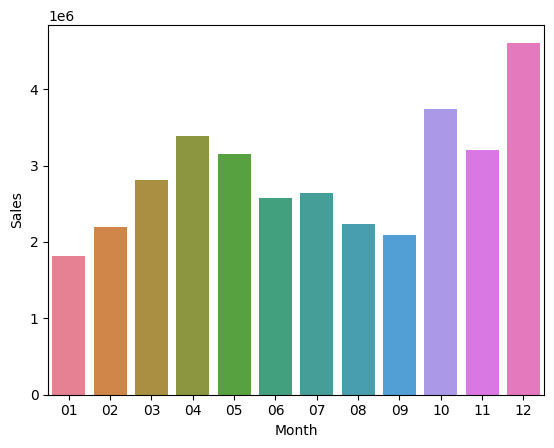

In [18]:
result= df.groupby('Month')['Sales'].sum().reset_index()

ax=sns.barplot(x='Month', y ='Sales', data = result, hue= 'Month')

    
plt.show()

**From the above bargraph we can see december was the best sale month with a sales of 4,608,295.70**

**Question2: what city had the highest number of sales?**

In [19]:
df.sample(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
21285,239582,Lightning Charging Cable,1,14.95,08/28/19 11:13,"647 Adams St, Seattle, WA 98101",08,14.95
159480,264777,Wired Headphones,1,11.99,10/24/19 10:32,"363 1st St, San Francisco, CA 94016",10,11.99


In [20]:
# adding the city column
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
df['City']= df['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

# df['City']= df['Purchase Address'].apply(lambda x : x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


In [21]:
df['City'].nunique()

10

In [22]:
sales_by_city = df.groupby('City')['Sales'].sum().reset_index()
sales_by_city.sort_values(by = 'Sales',ascending = False)

,City,Sales
8,San Francisco (CA),8254743.55
4,Los Angeles (CA),5448304.28
5,New York City (NY),4661867.14
2,Boston (MA),3658627.65
0,Atlanta (GA),2794199.07
3,Dallas (TX),2765373.96
9,Seattle (WA),2745046.02
7,Portland (OR),1870010.56
1,Austin (TX),1818044.33
6,Portland (ME),449321.38


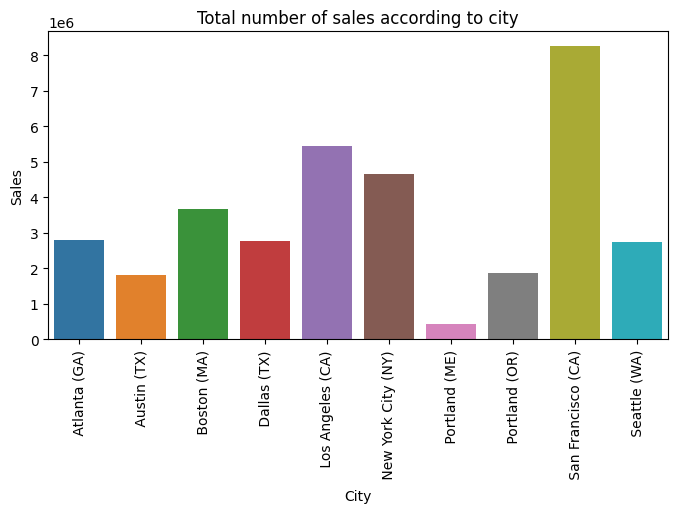

In [23]:
plt.figure(figsize=(8, 4)) 
ax =sns.barplot( x= 'City', y ='Sales', data = sales_by_city, hue='City')
plt.title('Total number of sales according to city')
plt.xticks(rotation= 'vertical')
# for x in ax.containers:
#     ax.bar_label(x)
plt.show()

In [24]:
sales_by_city = df.groupby('City')['Sales'].mean().reset_index()
sales_by_city.sort_values(by = 'Sales',ascending = False)

,City,Sales
0,Atlanta (GA),187.996977
5,New York City (NY),187.622938
7,Portland (OR),187.038464
3,Dallas (TX),186.887474
9,Seattle (WA),186.572828
8,San Francisco (CA),184.827002
4,Los Angeles (CA),184.288468
2,Boston (MA),183.841397
1,Austin (TX),183.826525
6,Portland (ME),183.321656


**Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?**

In [25]:
df.sample()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
124443,198593,ThinkPad Laptop,1,999.99,05/02/19 15:00,"774 12th St, San Francisco, CA 94016",05,999.99,San Francisco (CA)


In [26]:
df['Order Date']= pd.to_datetime(df['Order Date'])
df.dtypes


C:\Users\paude\AppData\Local\Temp\ipykernel_20312\1709031520.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date']= pd.to_datetime(df['Order Date'])


Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
Sales                      float64
City                        object
dtype: object

In [27]:
df['Hour']= df['Order Date'].dt.hour
df['Minute']= df['Order Date'].dt.minute
df['Second']= df['Order Date'].dt.second
df.head(1)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Second
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.9,Dallas (TX),8,46,0


In [28]:
df['Hour'].nunique()

24

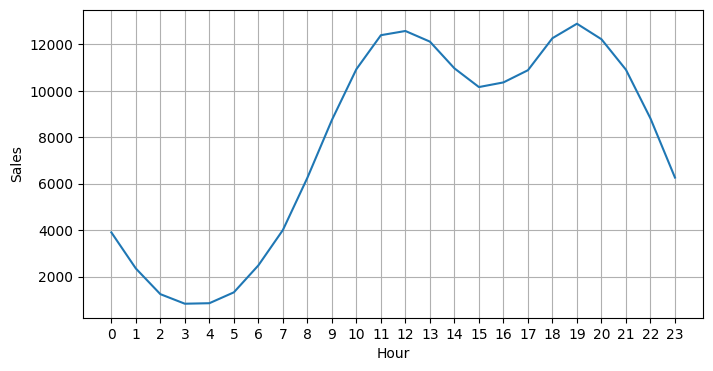

In [29]:
plt.figure(figsize=(8, 4))
result = df.groupby('Hour').count()
ax=sns.lineplot(x='Hour',y='Sales', data=result)

plt.xticks(range(0,24))
 
plt.grid()
plt.show()

so from above lineplot we can see maximum sales are around 12pm or 7pm.

In [30]:
df['Product'].nunique()



19

In [31]:
result = df.groupby(['Product','Quantity Ordered'])['Sales'].sum().sort_values(ascending= False).reset_index().head(10)
result

,Product,Quantity Ordered,Sales
0,Macbook Pro Laptop,1,8018900.00
1,iPhone,1,4783100.00
2,ThinkPad Laptop,1,4123958.76
3,Google Phone,1,3309000.00
4,27in 4K Gaming Monitor,1,2422227.89
5,34in Ultrawide Monitor,1,2339218.44
6,Apple Airpods Headphones,1,2312100.00
7,Flatscreen TV,1,1432500.00
8,Bose SoundSport Headphones,1,1316668.32
9,27in FHD Monitor,1,1118175.45


**Question 4:Which Product is ordered more?**

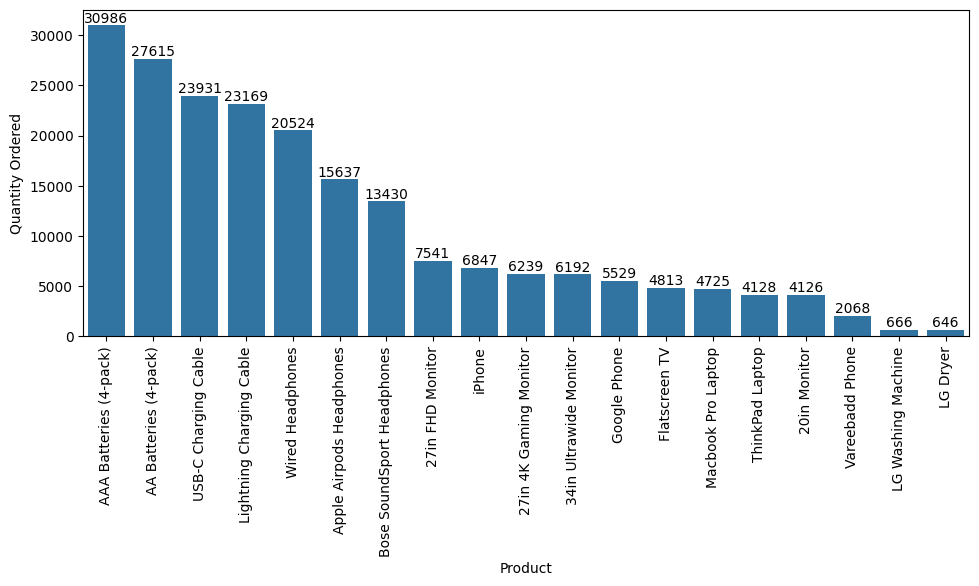

In [32]:
temp = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending =False).reset_index()

plt.figure(figsize=(10,4))
ax= sns.barplot(data =temp,x='Product',y='Quantity Ordered')
plt.tight_layout()
for x in ax.containers:
    ax.bar_label(x)
plt.xticks(rotation='vertical')
plt.show()